# Stats and Winrates - Undersanding Card Game Basics Through Visualiations


In [1]:
import plotly.io as pio
pio.renderers.default = 'png'

## Why this data set? 

As far back as I can remember, I've been enthrawled with competition. For the majority of my life this passion has been fulfilled through sports such as soccer, but overtime when I couldn't play, I would turn to video games to fill that desire. This has opened me up to a world of different competitive environments, and one which I found particularly novel was strategy games. Specifically I grew fancinated with Hearthstone, a online collectible card game from Blizzard Entertainment. 
<br>
One aspect that actually motivated me to pursue a degree in data science was the statistical elements of card games. Inherently card games rely on the probability of drawing cards in a deck, as a result every component of the game revolves around the opportunity cost of picking a card for your deck, and the how you end up drawing it. Overtime websites have developed to track the influence of putting a card into your deck, and players have evolved to utilize these tools to assess the value of cards as they are played. I look to explore the nature of the cards themselves, and try to find insights into what sorts of elements of a card tend to lend itself to winning.
<br>

## Basics of Hearthstone

Hearthston relies on a few fundamental rules that will be pertinent to the exploration further down:
* Generally, cards can cost between 0-10 "Mana" to play
    * Mana is accrued once per turn, starting at 1, maxing out at 10 (on turn 2 you will have two mana)
* A deck in hearthstone MUST have 30 cards
    * Some cards add additional cards at the start of game, but when creating a deck, the limit and minimum is 30
    * You can only have two copies of a single card in a deck, unless it's legendary rarity, in which case you can only have 1. 
* There are a few card types
    * Spells - Do something when played (deal, damage, draw cards)
    * Minions - Similar to spells, but come in the form of a unit which has attack and health. Max board space is 7 per player
        * There are few more but for this analysis I am only looking at minions, the most common card type.
* There are 11 classes, some cards can only be played by a certain class, otherwise they are "Neutral"
    * Rogue, Mage, Paladin, Hunter, Demon Hunter, Warlock, Deathknight, Shaman, Druid, Priest


## About this data set

Unfortunately, as most video games are not open source, it can be hard to analyse data from them because places that aggregate it generally do so through less "official" means. As such finding a suitable data set that was relevant to the modern game was challenging. The following data set is card statisitics of every **minion** in Hearthstone as of January 2024. At this time the game has been out for about 10 years. The data set is not that large, and so I've attempted to include it with the Repo this notebook is associated with. 

### Visualization Techique

I knew I wanted to use a scatter plot because I was going to have a ton of categorical variables that influenced a range of possible continuous varibles. With the scope of many cards and their relevance to each other, I believed a Scatter with filterable interactive elements allowed the best cohesive view of the "meta" the game had. But additionally I wanted some general charts to show distribution of classes across various metrics so we could get a grasp for what types of decks were being played, before we look at the cards and their influence. A Pie chart is nice for class distribution because we can get a sense of the split among the classes. We'll use the bars to look at the average variance in usage rate for class cards and finally we'll use a box and whisker to see if there are some patterns for rarity and winning. 


### Visualization Library

I chose Plotly because it’s easy to use, interactive, and works well with Jupyter Notebook. Plotly is open-source, created by Plotly, Inc., and can be installed with pip install plotly. It allows building detailed and interactive charts quickly, which helps explore data better. Since it integrates smoothly with Jupyter and offers more interactivity than libraries like Matplotlib or Seaborn. Plus similarly to many I wasn't as familiar with it so I thought it a good time to use it. 

### load data from github and check the first few rows

In [2]:
import pandas as pd
import numpy as np
import ipywidgets as wid
import plotly.graph_objects as go
from IPython.display import Image, display
import plotly.express as px
from ipywidgets import interact, HBox, VBox

#the data is pretty small so we should be able to load it from the github link
url = "https://raw.githubusercontent.com/tahaz/521assignment3/main/hearthstone_minions.csv"
df = pd.read_csv(url)


As you can see the data is pretty nice, but is in some awkward string forms which will need to be adjusted. Additionally, many fields which represent categorical variables have been converted to numbers, this data set didn't provide much information as to what is labeled as what, so I will need to invesigate the data based on what I know about the game to determine for example, what class is "3".

In [3]:
def basic_renaming(df):
    # List of columns I want to see, we won't visualize all but I want some info if I want to see more about a particular card.
    columns_to_keep = ['card_name', 'in_perc_of_decks', 'avg_copies', 'deck_winrate', 'times_played', 
    'url', 'CLASS', 'RARITY', 'COLLECTIBLE', 'COST', 
    'HEALTH', 'ATK', 'BATTLECRY', 'DISCOVER', 'TAUNT', 
    'DEATHRATTLE', 'FREEZE', 'FORGE', 'DIVINE_SHIELD', 'TECH_LEVEL', 
    'CHARGE', 'COMBO', 'OVERLOAD', 'REBORN', 'RUSH', 
    'DREDGE', 'SPELLPOWER', 'KABAL', 'SECRET', 'MAGNETIC', 
    'WINDFURY', 'OUTCAST', 'POISONOUS', 'LIFESTEAL', 'OVERKILL', 
    'CHOOSE_ONE', 'INFUSE', 'STEALTH', 'TRADEABLE', 'SILENCE', 
    'FRENZY', 'SPELLBURST', 'EVILZUG', 'ADAPT', 'INSPIRE', 
    'ECHO', 'HONORABLEKILL', 'ENRAGED', 'RECRUIT', 'OVERHEAL', 
    'SPARE_PART']
    
    # Rename columns so they're easier to type
    df = df[columns_to_keep].rename(columns={
        'card_name': 'name', 'in_perc_of_decks': 'usage_rate', 'avg_copies': 'avg_copies',
        'deck_winrate': 'deck_winrate', 'times_played': 'times_played', 'url': 'url',
        'CLASS': 'class', 'RARITY': 'rarity', 'COLLECTIBLE': 'collectible', 'COST': 'cost',
        'HEALTH': 'health', 'ATK': 'attack', 'BATTLECRY': 'battlecry', 'DISCOVER': 'discover',
        'TAUNT': 'taunt', 'DEATHRATTLE': 'deathrattle', 'FREEZE': 'freeze', 'FORGE': 'forge',
        'DIVINE_SHIELD': 'divine_shield', 'TECH_LEVEL': 'tech_level', 'CHARGE': 'charge',
        'COMBO': 'combo', 'OVERLOAD': 'overload', 'REBORN': 'reborn', 'RUSH': 'rush',
        'DREDGE': 'dredge', 'SPELLPOWER': 'spellpower', 'KABAL': 'kabal', 'SECRET': 'secret',
        'MAGNETIC': 'magnetic', 'WINDFURY': 'windfury', 'OUTCAST': 'outcast', 'POISONOUS': 'poisonous',
        'LIFESTEAL': 'lifesteal', 'OVERKILL': 'overkill', 'CHOOSE_ONE': 'choose_one',
        'INFUSE': 'infuse', 'STEALTH': 'stealth', 'TRADEABLE': 'tradeable', 'SILENCE': 'silence',
        'FRENZY': 'frenzy', 'SPELLBURST': 'spellburst', 'EVILZUG': 'evilzug', 'ADAPT': 'adapt',
        'INSPIRE': 'inspire', 'ECHO': 'echo', 'HONORABLEKILL': 'honorable_kill',
        'ENRAGED': 'enraged', 'RECRUIT': 'recruit', 'OVERHEAL': 'overheal', 'SPARE_PART': 'spare_part'
    })
    
    # the url column links to an old wiki, but the urls are the same except the domain, lets replace it so we can see the cards
    df['url'] = df['url'].str.replace(r'fandom\.com', 'wiki.gg', regex=True)
    return(df)
basic_df = basic_renaming(df)

In [4]:
def clean_cards(df):
    # replace invalid percentages with nan
    df['usage_rate'] = df['usage_rate'].replace({'0%': None, '-': None})
    df['deck_winrate'] = df['deck_winrate'].replace({'0%': None, '-': None})
    
    # convert percentages to decimal
    df['usage_rate'] = df['usage_rate'].str.rstrip('%').astype(float) / 100
    df['deck_winrate'] = df['deck_winrate'].str.rstrip('%').astype(float) / 100
    
    # remove commas and convert to int
    df['times_played'] = df['times_played'].str.replace(',', '').astype(int)

    # scale usage rate with log adjustment
    df['adjusted_usage_rate'] = np.log1p(df['usage_rate'] * 100) ** 1.5

    # filter out low play count
    df = df[df['times_played'] >= 1000]
    return(df)

hearthstone_minions_df = clean_cards(basic_df)


In [5]:
# lets explore the categorical varibles which are now numbers to figure out what they mean, we'll write a function to return a sample of unique values and assess.

def print_examples(df, col_name):
    unique_vals = df[col_name].dropna().unique()
    for val in unique_vals:
        example = df[df[col_name] == val][['name', 'url', 'class', 'rarity', col_name]].head(1)
        print(f"{col_name}: {val}")
        print(example.to_string(index=False))
        print("-" * 50)

# replace rarity with anything you'd like to see unique values of...
print_examples(basic_df, 'rarity')


rarity: 5.0
                name                                                    url  class  rarity  rarity
E.T.C., Band Manager https://hearthstone.wiki.gg//wiki/E.T.C.,_Band_Manager   12.0     5.0     5.0
--------------------------------------------------
rarity: 1.0
            name                                                url  class  rarity  rarity
Kobold Librarian https://hearthstone.wiki.gg//wiki/Kobold_Librarian    9.0     1.0     1.0
--------------------------------------------------
rarity: 4.0
     name                                         url  class  rarity  rarity
Dirty Rat https://hearthstone.wiki.gg//wiki/Dirty_Rat   12.0     4.0     4.0
--------------------------------------------------
rarity: 3.0
            name                                                url  class  rarity  rarity
Coldlight Oracle https://hearthstone.wiki.gg//wiki/Coldlight_Oracle   12.0     3.0     3.0
--------------------------------------------------
rarity: 2.0
            name    

In [6]:
# using the function above, you can replace the column name with whatever you want to investiate. 
# We'll use what we learn to create reference dictionaries so we can replace numbers with names if we'd like for labels and such.

rarityDict = {
    1.0: 'Common',
    2.0: 'Base', # <- I didn't even know this existed, these are cards just given to the player in the base set challenges and have no rarity
    3.0: 'Rare',
    4.0: 'Epic',
    5.0: 'Legendary'
}

classDict = {
    1.0: 'Death Knight',
    2.0: 'Druid',
    3.0: 'Hunter',
    4.0: 'Mage',
    5.0: 'Paladin',
    6.0: 'Priest',
    7.0: 'Rogue',
    8.0: 'Shaman',
    9.0: 'Warlock',
    10.0: 'Warrior',
    12.0: 'Neutral',
    14.0: 'Demon Hunter'
}

# lets also define custom colors for class
class_colors = {
    'Death Knight': 'gray',
    'Druid': 'brown',
    'Hunter': 'green',
    'Mage': 'blue',
    'Paladin': 'yellow',
    'Priest': 'white',
    'Rogue': 'black',
    'Shaman': 'darkblue',
    'Warlock': 'purple',
    'Warrior': 'red',
    'Neutral': 'orange',
    'Demon Hunter': 'darkgreen'
}

# and custom shapes for rarity
rarity_shapes = {
    'Common': 'circle',
    'Rare': 'diamond',
    'Epic': 'square',
    'Legendary': 'triangle-up'
}


# Map class numbers to class names
hearthstone_minions_df['class_name'] = hearthstone_minions_df['class'].map(classDict)
hearthstone_minions_df['rarity_name'] = hearthstone_minions_df['rarity'].map(rarityDict)

### Let's breakdown the meta based on the metris we've saved. Once we look at how people are playing the game, we'll break down these separate factors into our final scatter to make some deeper connectnions.

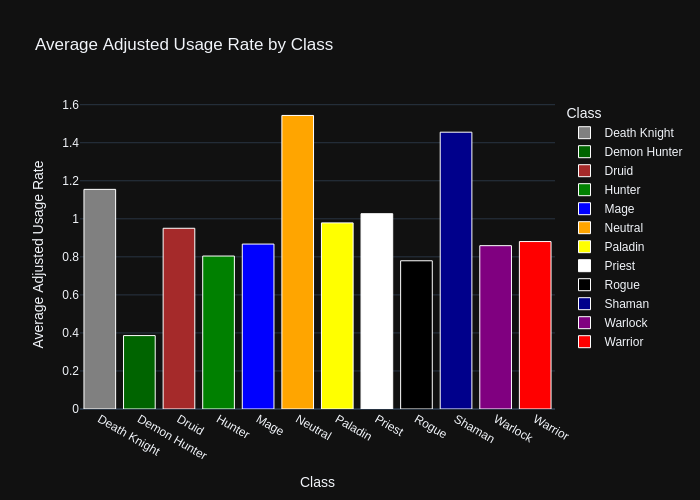

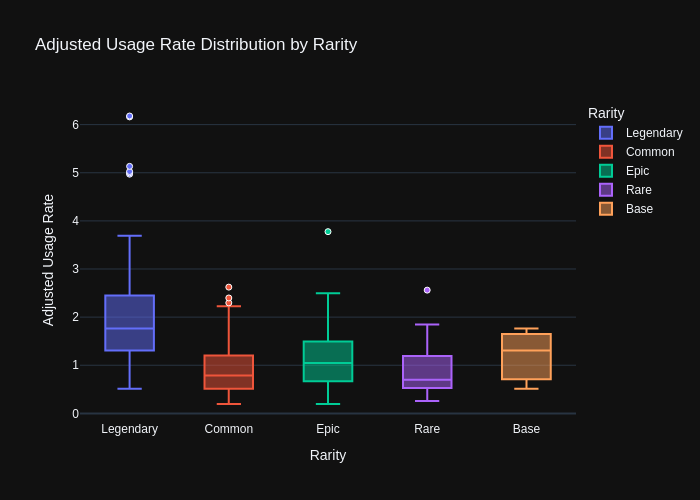

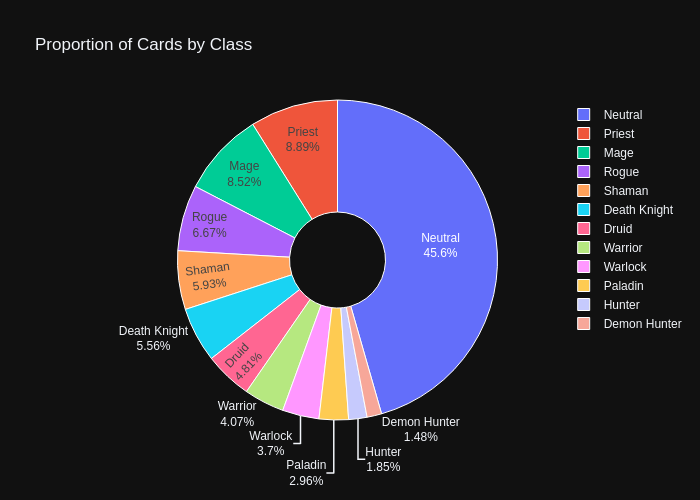

In [7]:


# Bar chart: Average Adjusted Usage Rate by Class
avg_class = hearthstone_minions_df.groupby('class_name')['adjusted_usage_rate'].mean().reset_index()
fig_avg_class = px.bar(
    avg_class,
    x='class_name',
    y='adjusted_usage_rate',
    color='class_name',
    title='Average Adjusted Usage Rate by Class',
    labels={'adjusted_usage_rate': 'Average Adjusted Usage Rate', 'class_name': 'Class'},
    template='plotly_dark',
    color_discrete_map=class_colors
)
fig_avg_class.update_traces(marker=dict(line=dict(color='white', width=1)))
fig_avg_class.show()

# Box plot: Adjusted Usage Rate by Rarity
fig_rarity_box = px.box(
    hearthstone_minions_df,
    x='rarity_name',
    y='adjusted_usage_rate',
    color='rarity_name',
    title='Adjusted Usage Rate Distribution by Rarity',
    labels={'adjusted_usage_rate': 'Adjusted Usage Rate', 'rarity_name': 'Rarity'},
    template='plotly_dark'
)
fig_rarity_box.update_traces(marker=dict(line=dict(color='white', width=1)))
fig_rarity_box.show()

# Pie chart: Proportion of Cards by Class
fig_class_pie = px.pie(
    hearthstone_minions_df,
    names='class_name',
    title='Proportion of Cards by Class',
    template='plotly_dark',
    color_discrete_map=class_colors,
    hole=0.3  # Slight donut effect for readability
)
fig_class_pie.update_traces(textinfo='percent+label', marker=dict(line=dict(color='white', width=1)))
fig_class_pie.show()


### Let's get familiar with a simple scatterplot and look if we can see anything novel right away

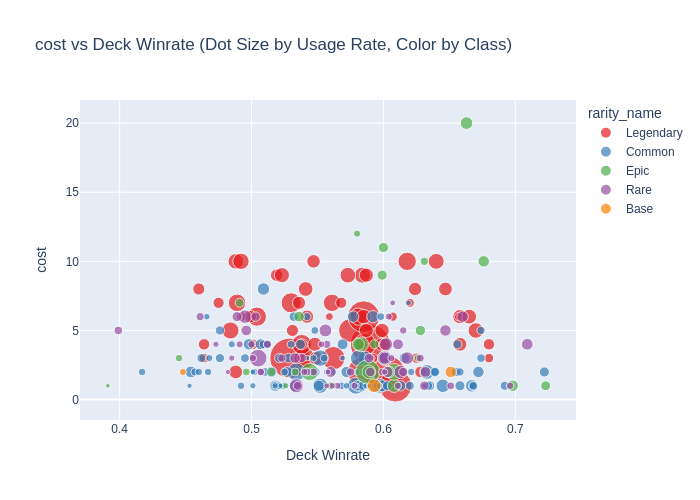

In [8]:

def plotly_scatter(df, col_name, classDict):

    fig = px.scatter(
        df,
        x='deck_winrate',
        y=col_name,
        size='usage_rate',
        color='rarity_name',
        color_discrete_sequence=px.colors.qualitative.Set1,  #we will match the colors to their in game color as best we can later
        title=f'{col_name} vs Deck Winrate (Dot Size by Usage Rate, Color by Class)',
        labels={'class_name': 'Class'},
        opacity=0.7
    )

    fig.update_traces(marker=dict(sizemode='area', sizeref=2. * max(df['usage_rate']) / (40.**2)))
    fig.update_layout(
        xaxis_title='Deck Winrate',
        yaxis_title=col_name
    )
    
    fig.show()

# Example usage
plotly_scatter(hearthstone_minions_df, 'cost', classDict)


### Interesting, I said before max mana is 10. Why is a 20 mana minion winning, let alone even possible to play? Well lets take a look at the url for the card and see....

In [9]:
url_20_mana = hearthstone_minions_df.loc[hearthstone_minions_df['cost'] == 20, 'url'].iloc[0]
print(url_20_mana)

https://hearthstone.wiki.gg//wiki/Molten_Giant


#### Ahh so if you clicked the link you'll see the minion starts at 20 mana, and drops based on lost life. 

In [10]:
def url_from_name(card_name):
    name = card_name.replace(" ", "_")
    image_url = f"https://hearthstone.wiki.gg/wiki/Special:FilePath/{name}.png"
    return(image_url)
    
Image(url=url_from_name(hearthstone_minions_df.loc[hearthstone_minions_df['cost'] == 20, 'name'].iloc[0]))

### Let's start adding interactivety. Cards can been looked at by various values, so lets create sliders and drop downs for different elements and see if we can pull some interesting ideas. 

#### We'll add interaction for the following metrics to adjust the plot

* Rarity
* Class
* Cost
* Attack
* Health
* Charge

##### *Charge is a simple keyword, but it's extremely powerful. In Hearthstone you only act on your turn, as a result players dictact what their minions attack, not what they block. Charge allows a player to immediately attack when a minion is played, unlike a normal card which needs to rest until the following turn. As a result in history this has been an extremely powerful effect, but they've slowed withered down the usage so I'm curious if any powerful charge minions still existed when this data was put together.*



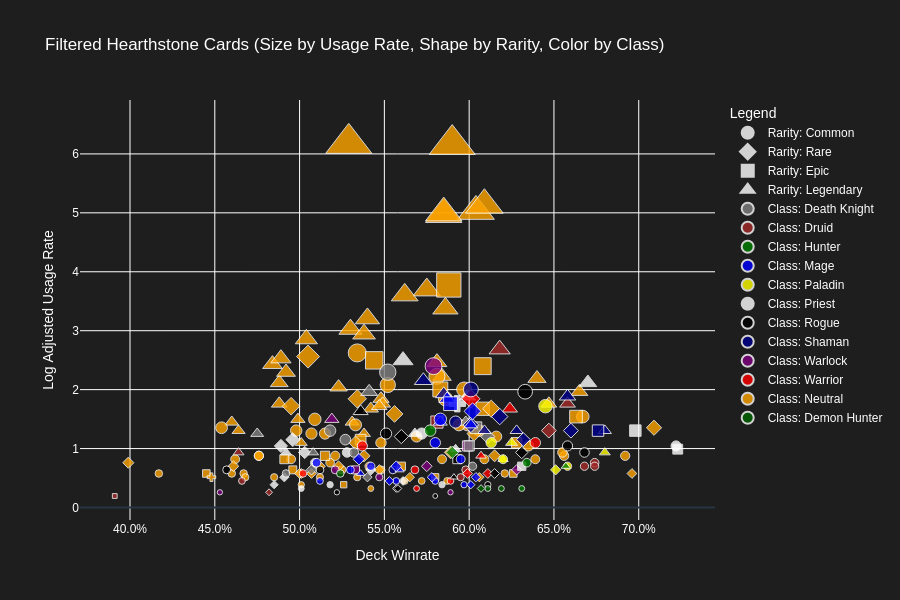

In [11]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import plotly.io as pio
from IPython.display import Image, display

pio.renderers.default = 'png'

# Map class and rarity to the dataframe
hearthstone_minions_df['class_name'] = hearthstone_minions_df['class'].map(classDict)
hearthstone_minions_df['rarity_name'] = hearthstone_minions_df['rarity'].map(rarityDict)

# Default filter values
default_rarity = list(rarityDict.values())
default_class = list(classDict.values())
default_cost = [hearthstone_minions_df['cost'].dropna().min(), hearthstone_minions_df['cost'].dropna().max()]
default_attack = [hearthstone_minions_df['attack'].dropna().min(), hearthstone_minions_df['attack'].dropna().max()]
default_health = [hearthstone_minions_df['health'].dropna().min(), hearthstone_minions_df['health'].dropna().max()]
default_charge = None

# Function to filter and plot based on default values
def filter_and_plot(rarity, class_name, cost, attack, health, charge):
    # Filter df by rarity, class, cost, attack, and health
    df_filtered = hearthstone_minions_df[
        (hearthstone_minions_df['rarity_name'].isin(rarity)) &
        (hearthstone_minions_df['class_name'].isin(class_name)) &
        (hearthstone_minions_df['cost'].between(cost[0], cost[1])) &
        (hearthstone_minions_df['attack'].between(attack[0], attack[1])) &
        (hearthstone_minions_df['health'].between(health[0], health[1]))
    ]
    
    # Apply charge filter if selected
    if charge == 1.0:
        df_filtered = df_filtered[df_filtered['charge'] == 1.0]
    elif charge == 'nan':
        df_filtered = df_filtered[df_filtered['charge'].isna()]
    
    # Format winrate and usage rate as percentages
    df_filtered['deck_winrate_pct'] = (df_filtered['deck_winrate'] * 100).round(1).astype(str) + '%'
    df_filtered['usage_rate_pct'] = (df_filtered['usage_rate'] * 100).round(1).astype(str) + '%'
    
    # Create scatter plot with class and rarity
    fig = px.scatter(
        df_filtered,
        x='deck_winrate',
        y='adjusted_usage_rate',
        size='usage_rate',
        color='class_name',
        symbol='rarity_name',
        hover_data={
            'name': True,
            'class_name': True,
            'rarity_name': True,
            'deck_winrate_pct': True,
            'usage_rate_pct': True
        },
        color_discrete_map=class_colors,
        symbol_map=rarity_shapes,
        title='Filtered Hearthstone Cards (Size by Usage Rate, Shape by Rarity, Color by Class)',
        labels={'rarity_name': 'Rarity', 'class_name': 'Class'},
        template='plotly_dark'  # dark mode
    )
    
    # Customize hover information
    fig.update_traces(
        hovertemplate='<b>%{customdata[0]}</b><br>' +  # name
                      'Class: %{customdata[1]}<br>' +
                      'Rarity: %{customdata[2]}<br>' +
                      'Winrate: %{customdata[3]}<br>' +
                      'Usage Rate: %{customdata[4]}<extra></extra>'
    )
    
    # Remove auto-generated legends by px.scatter
    fig.for_each_trace(lambda t: t.update(showlegend=False))

    # Add shape legend for rarity
    for rarity, shape in rarity_shapes.items():
        fig.add_trace(
            go.Scatter(
                x=[None],
                y=[None],
                mode='markers',
                marker=dict(symbol=shape, size=10, color='white', line=dict(color='white', width=2)),
                name=f'Rarity: {rarity}',
                legendgroup="rarity_group",
                showlegend=True
            )
        )

    # Add color legend for class
    for class_name, color in class_colors.items():
        fig.add_trace(
            go.Scatter(
                x=[None],
                y=[None],
                mode='markers',
                marker=dict(size=10, color=color, line=dict(color='white', width=1)),
                name=f'Class: {class_name}',
                legendgroup="class_group",
                showlegend=True
            )
        )
    
    # Update marker and layout options
    fig.update_traces(
        marker=dict(
            sizemode='area',
            sizeref=2. * max(hearthstone_minions_df['usage_rate']) / (40.**2),
            line=dict(color='white', width=1),
            opacity=0.8
        )
    )        
    fig.update_layout(
        xaxis_title='Deck Winrate',
        yaxis_title='Log Adjusted Usage Rate',
        legend_title_text='Legend',
        plot_bgcolor='#1E1E1E',  # dark background
        paper_bgcolor='#1E1E1E',
        font=dict(color='white'),
        xaxis=dict(gridcolor='white', tickformat='.1%'),
        yaxis=dict(gridcolor='white')
    )
    
    # Render the plot as an image in the notebook
    img_bytes = fig.to_image(format="png", width=900, height=600)
    display(Image(img_bytes))

# Run filter_and_plot with default values
filter_and_plot(
    default_rarity,
    default_class,
    default_cost,
    default_attack,
    default_health,
    default_charge
)


### Conclusions

So at the end of the day we can see the game is decently balanced, but there's a catch... At the start of this story I mentioned video games being great resources for data exploration but one caveat of this is that most players are all single focused in these competitive types of games. Players WANT to **win** and this simple fact heavily skews what data you can gather from players. The best players will play with the best cards in the best decks, further cementing their winrates and usage as the meta developes. It's very important when looking at data from games to consider the types of players you have, and what influence that has over the game and the data it returns. 

In Hearthstone that means maybe even singling out unique players and their habits and considering these anomalies worthwhile to view. The average player is going to be well...average, and so considering your game as a whole might not be the right approach. We might see Molten Giants winrate as a bit of a problem, but it's cost in a game like Hearthstone revolves around the players health, something that is manipulated by both sides of the table. This interactivity is at the heart of game, and neutering good cards that promote this interactivity in my opinion defeats the point.

Data in this age is the heart of many balance and design strategies, but the ephermal feeling of fun is what makes a good game. How we take this sort of exploration and tie it back into our games is a delicate balance. And this balancing act is why I got into this whole industry to begin with...

Hope you enjoy playing around with the visuals, and if you played Hearthstone, what surprised you the most?

###### *also remember when I said charge was powerful and being promoted less and less, well there's only one card in this data that still maintained that tag and it's being changed for 2025...can you find it?*